# **Titanic**

## **Set up**

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

import os
import numpy as np
import pandas as pd
import warnings

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



warnings.filterwarnings('ignore')

## **Load Titanic Data**

In [2]:
import os
import zipfile
import urllib

downlaod_root = "https://raw.githubusercontent.com/dfongang/handson-ml2/master/"
data_path = os.path.join("datasets")
data_url = downlaod_root + "chapter_03/datasets/titanic.zip"

def fetch_titanic_data(data_url=data_url, data_path=data_path):
    os.makedirs(data_path, exist_ok=True)
    zip_path = os.path.join(data_path, 'titanic.zip')
    urllib.request.urlretrieve(data_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zp:
        zp.extractall(path=data_path)

In [3]:
fetch_titanic_data()

### Load the data

In [4]:
def load_data(data_path, fname):
    csv_path = os.path.join(data_path, fname)
    return pd.read_csv(csv_path)

In [5]:
raw_data = load_data(data_path, 'train.csv')
submit_data = load_data(data_path, 'test.csv')

In [6]:
print('raw_data.shape:', raw_data.shape)
print('submit_data.shape:', submit_data.shape)

raw_data.shape: (891, 12)
submit_data.shape: (418, 11)


As stated in https://www.kaggle.com/c/titanic/data, the test data (`submit_data`) doesn't have the label column.
Meaning that there is no column stating whether or not a passenger survided.

In [7]:
submit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
raw_data.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [10]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
raw_data[raw_data['Fare']>=30.0]['Survived'].describe()

count    240.000000
mean       0.587500
std        0.493313
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [12]:
raw_data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [13]:
raw_data[raw_data['Fare']<30.0]['Survived'].describe()

count    651.000000
mean       0.308756
std        0.462335
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Very surprised to see how the average of persons that survived varies depending on the passenger fare. \
Passengers with a fare greater than 30.0 have 58.75% to survive against 30.88% for those with a fare lower than 30.0.

In [16]:
print('len of unique cabin:', len(raw_data['Cabin'].unique()))
print('n-unique cabin:', raw_data['Cabin'].nunique())

len of unique cabin: 148
n-unique cabin: 147


In [17]:
print('len of unique embarked:', len(raw_data['Embarked'].unique()))
print('n-unique embarked:', raw_data['Embarked'].nunique())

len of unique embarked: 4
n-unique embarked: 3


## **Data Cleaning and Data Preparation**

Set `PassengerId` as the Index.

In [18]:
raw_data.set_index('PassengerId', inplace=True)
submit_data.set_index('PassengerId', inplace=True)

In [20]:
raw_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Data Labels

In [21]:
raw_data_labels = raw_data['Survived'].copy()
raw_data = raw_data.drop('Survived', axis=1)

In [31]:
print(list(raw_data.columns))

['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [33]:
submit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [165]:
from pandas.api.types import is_numeric_dtype, is_object_dtype
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def data_preparation(data, drop_columns=['Name', 'Ticket', 'Cabin'], 
                     encoder_drop='None', std_scaler=True):
    
    
    # 1- drop columns
    data = data.drop(drop_columns, axis=1)
    
    # 2- Impute missing values
    for col in list(data.columns):
        if is_numeric_dtype(data[col]):
            data[col][data[col].isnull()] = data[col].median()
            continue
        if is_object_dtype(data[col]):
            data[col][data[col].isnull()] = data[col].value_counts().index[0]
            continue
    
    # 3- Encoding categorical attributes
    cat_attribs = [ col for col in list(data.columns) if is_object_dtype(data[col])]

    one_hot_encoder = OneHotEncoder(drop=encoder_drop, handle_unknown='ignore')
    data_cat_1hot = one_hot_encoder.fit_transform(data[cat_attribs])

    data_cat_1hot = pd.DataFrame(data=data_cat_1hot.toarray(), 
                                 columns=one_hot_encoder.get_feature_names_out(),
                                 index=data.index)
    # concat both data frames
    data = pd.concat([data, data_cat_1hot], axis=1)
    # drop original categorical variables
    data.drop(cat_attribs, axis=1, inplace=True)

    if std_scaler==True:
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        data = pd.DataFrame(data=data_scaled,
                            columns=data.columns,
                            index=data.index)

    return data


In [176]:
data = data_preparation(raw_data, encoder_drop='if_binary')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
dtypes: float64(9)
memory usage: 101.9 KB


## **Train/Test Split**

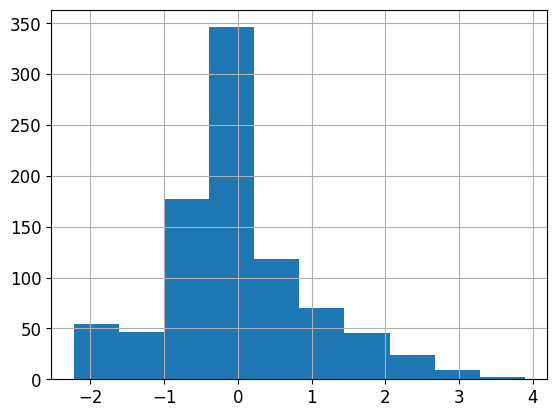

In [177]:
data['Age'].hist()
plt.show()

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.15, random_state=42)

In [179]:
y_train, y_test = raw_data_labels[X_train.index], raw_data_labels[X_test.index]

## **Model Training, Selection and Validation**

In [180]:
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

log_reg = LogisticRegressionCV(cv=5, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.8005284015852048

In [182]:

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()

np.float64(0.7978563959567794)

### Support Vector Machine (SVC)

In [183]:
from sklearn.svm import SVC
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
cross_val_score(svc_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()

np.float64(0.8190135935866156)